## Import libraries

In [3]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.arima.model import ARIMA
import statistics
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import nbimporter

C:\Users\costa\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


## Import Dataset

In [53]:
df = pd.read_csv('2022-03.csv')
df

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
0,Transform:,5.000,5.0,5.000,5.000000e+00,5.00000,5.0000,5.0000,5.0000,5.0000,...,6.000,6.000,6.00,6.00,6.00,2.0,6.00,6.00,6.0000,1.0000
1,1/1/1959,2442.158,2293.2,17.272,2.922664e+05,18235.77392,22.0733,23.4027,22.2858,31.5688,...,17.791,11.326,2.13,2.45,2.04,NaN,6476.00,12298.00,84.2043,NaN
2,2/1/1959,2451.778,2301.5,17.452,2.944247e+05,18369.56308,22.5056,23.7185,22.4788,31.8004,...,17.798,11.343,2.14,2.46,2.05,NaN,6476.00,12298.00,83.5280,NaN
3,3/1/1959,2467.594,2318.5,17.617,2.934187e+05,18523.05762,22.8298,23.8621,22.5892,31.8004,...,17.785,11.363,2.15,2.45,2.07,NaN,6508.00,12349.00,81.6405,NaN
4,4/1/1959,2483.671,2334.9,17.553,2.993228e+05,18534.46600,23.3161,24.2067,22.9201,32.3021,...,17.796,11.403,2.16,2.47,2.08,NaN,6620.00,12484.00,81.8099,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,11/1/2021,17744.971,14406.3,125.640,1.572476e+06,642636.00000,102.0298,101.2278,101.6805,100.7470,...,105.852,126.278,26.99,31.04,24.24,67.4,369983.50,754662.69,5607.1160,19.1586
756,12/1/2021,17724.218,14398.0,123.868,1.562935e+06,625459.00000,101.6188,100.7811,101.2251,100.0557,...,106.351,126.834,27.17,31.25,24.38,70.6,370554.92,753781.25,5678.9555,21.2985
757,1/1/2022,17637.890,14363.1,126.504,1.594543e+06,656117.00000,103.0309,102.2329,102.9328,102.4891,...,107.148,127.303,27.29,31.45,24.48,67.2,371315.40,753714.52,5777.2852,22.9143
758,2/1/2022,17620.889,14373.4,126.039,NaN,658128.00000,103.5811,102.8109,103.3802,102.1002,...,109.077,127.654,27.41,31.62,24.54,62.8,NaN,NaN,5810.7499,26.1429


- Individuare la serie storica di interesse
- Eliminare valori nulli
- Eliminare la prima riga (Transform???)
- Resetta l'indice a zero

In [5]:
df.iloc[450]

sasdate              6/1/1996
RPI                  9157.654
W875RX1                7874.4
DPCERA3M086SBEA        64.777
CMRMTSPLx          916487.771
                      ...    
UMCSENTx                 92.4
DTCOLNVHFNM          86333.37
DTCTHFNM            303932.73
INVEST               899.5332
VIXCLSx               17.6216
Name: 450, Length: 128, dtype: object

## Transformations

In [6]:
from datetime import datetime, timedelta

In [7]:
df_NDG = df[['sasdate','DNDGRG3M086SBEA']]
df_NDG.dropna(inplace=True)
df_NDG.drop(index=0,inplace=True)
df_NDG.reset_index(inplace=True, drop=True)
df_NDG['sasdate']= pd.to_datetime(df_NDG.sasdate)

In [8]:
df_NDG['DNDGRG3M086SBEA'] = np.log(df_NDG['DNDGRG3M086SBEA'])

<AxesSubplot:xlabel='sasdate'>

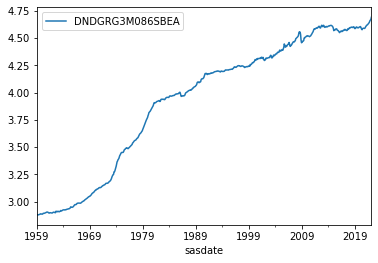

In [9]:
df_NDG.plot(x='sasdate', y= 'DNDGRG3M086SBEA')

Mostrare Serie storica completa

Usare scala logaritmica

##### Dividere in 'training set' e 'test set'

Definire percentuale di test set

In [11]:
df_NDG = df_NDG['DNDGRG3M086SBEA'][300:450]

In [12]:
df_NDG_train = df_NDG[:120]

In [13]:
df_NDG_test = df_NDG[120:150]

## ACF e PACF

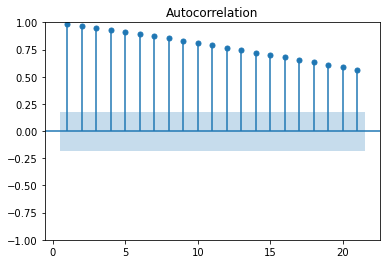

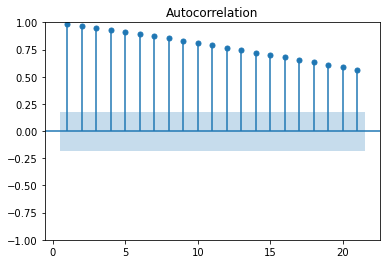

In [14]:
plot_acf(df_NDG_train, zero=False, bartlett_confint=False)

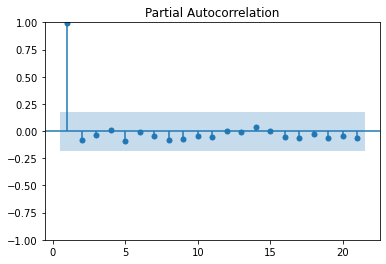

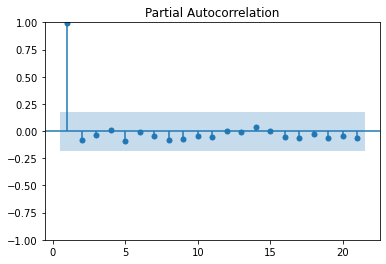

In [15]:
plot_pacf(df_NDG_train, zero = False)

## ADF

In [16]:
adfuller(df_NDG_train)

(-0.3083538850755352,
 0.9243128105355384,
 2,
 117,
 {'1%': -3.487517288664615,
  '5%': -2.8865777180380032,
  '10%': -2.5801239192052012},
 -853.2622838455553)

## Stima p e q


#### Serie in differenza prima

In [17]:
pmax = 2
qmax = 2
aic = np.empty((pmax+1,qmax+1))
aic[:] = np.NaN
bic = aic
for p in range(0,pmax+1):
    for q in range(0,qmax+1):
        a = ARIMA(df_NDG_train, order=(p,1,q))
        mdl = a.fit()
        aic[p,q] = mdl.aic
        bic[p,q] = mdl.bic

In [18]:
aic_min = list(np.unravel_index(aic.argmin(), aic.shape))
aic_min

[1, 0]

In [19]:
bic_min = list(np.unravel_index(bic.argmin(), bic.shape))
bic_min

[1, 0]

Il risultato è quello che ci aspettavamo, perchè per un numero ridotto di lag i risultati tendono a coincidere. Questo perchè il modello di Schwarz penalizza di più il numero di iperparametri selezionati (ordini p e q). 

## Residui

#### Serie in differenza prima

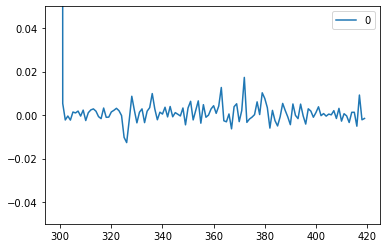

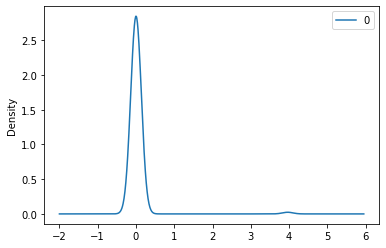

                0
count  120.000000
mean     0.033915
std      0.361806
min     -0.012654
25%     -0.001552
50%      0.000741
75%      0.002945
max      3.964027


In [57]:
a = ARIMA(df_NDG_train, order=(1,1,0))
mdl = a.fit()
residuals = pd.DataFrame(mdl.resid)
residuals.plot(ylim=(-0.05,0.05))
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

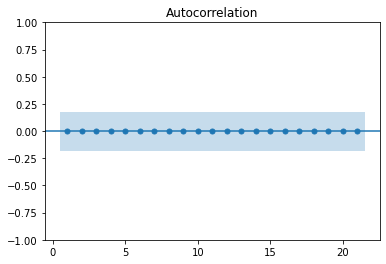

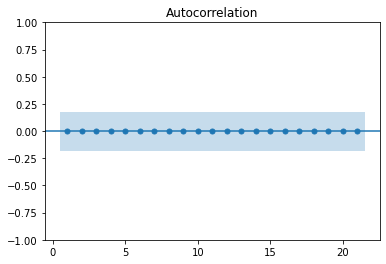

In [21]:
plot_acf(residuals,zero=False)

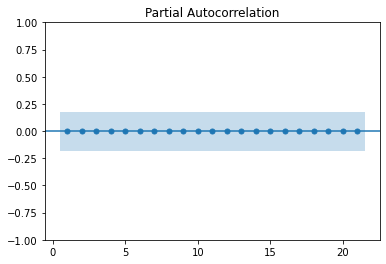

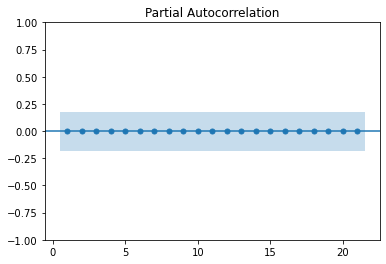

In [22]:
plot_pacf(residuals,zero=False)

In [23]:
print(mdl.summary())

                               SARIMAX Results                                
Dep. Variable:        DNDGRG3M086SBEA   No. Observations:                  120
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 483.650
Date:                Fri, 15 Apr 2022   AIC                           -963.300
Time:                        12:50:53   BIC                           -957.742
Sample:                             0   HQIC                          -961.043
                                - 120                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5448      0.070      7.727      0.000       0.407       0.683
sigma2       1.72e-05   1.52e-06     11.300      0.000    1.42e-05    2.02e-05
Ljung-Box (L1) (Q):                   0.00   Jarque-

## Predizione

### 1 Modello

In [24]:
pred = []
test_size = len(df_NDG_test)
for i in range(test_size):
    a = ARIMA(df_NDG[:len(df_NDG_train)+i], order=(1,1,0))
    mdl = a.fit()
    pred.append(float(mdl.forecast(1)))

In [25]:
pred = pd.Series(pred)

In [26]:
pred.index = np.arange(420, 450)

<AxesSubplot:>

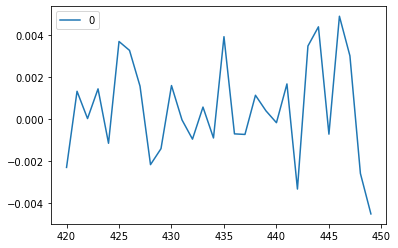

In [27]:
residuals = df_NDG_test - pred
pd.DataFrame(residuals).plot()

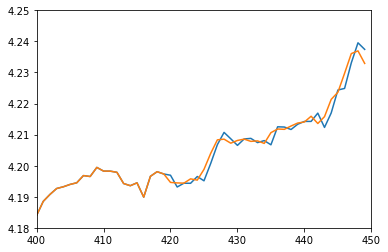

In [28]:
total = pd.concat([df_NDG_train,pred])

total.plot(ylim=[4.18,4.25],xlim=[400,450])
#total.plot()
plt.plot(df_NDG)
plt.show()


#### Mean square forecast error

In [29]:
#MSFE = list(residuals)
#MSFE = statistics.mean([x**2 for x in MSFE])
#MSFE

In [60]:
MSFE = statistics.mean((df_NDG_test - pred)**2)
MSFE

5.7246419176172834e-06

### 2 Modello

In [33]:
list_NDG = list(df_NDG)
diff_prime = [0]
for i in range(1,len(df_NDG)):
    diff_prime.append(list_NDG[i] - list_NDG[i-1])

In [34]:
df_NDG = pd.DataFrame(df_NDG)

In [35]:
diff_prime = pd.Series(diff_prime)

In [36]:
df_NDG['diff'] = diff_prime.values

In [61]:
df_NDG

,DNDGRG3M086SBEA,diff
300,3.964027,0.000000
301,3.969367,0.005340
302,3.970028,0.000661
303,3.969952,-0.000075
304,3.967609,-0.002343
...,...,...
445,4.223632,0.002287
446,4.229749,0.006118
447,4.236076,0.006326
448,4.236958,0.000882


In [37]:
avg_diff = []
test_size = len(df_NDG_test)

for i in range(test_size):
    a = df_NDG[:len(df_NDG_train)+ i+1]['diff'].mean()
    avg_diff.append(a)
    
avg_diff = pd.Series(avg_diff)

In [43]:
pred2 = []
temp = df_NDG[len(df_NDG_train)-1:]['DNDGRG3M086SBEA'].reset_index(drop=True)

for i in range (test_size):
    b = avg_diff[i] + temp[i]
    pred2.append(b)

pred2 = pd.Series(pred2)

total = pd.concat([df_NDG_train.reset_index(drop=True), pred2])
total.index = np.arange(300, 450)

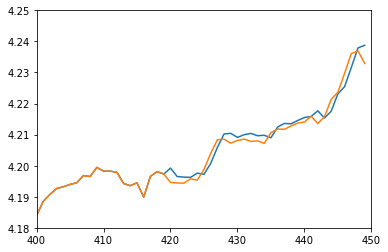

In [44]:
total.plot(ylim=[4.18,4.25],xlim=[400,450])
plt.plot(df_NDG['DNDGRG3M086SBEA'])
plt.show()

In [45]:
residuals2 = df_NDG_test.reset_index(drop=True) - pred2

<AxesSubplot:>

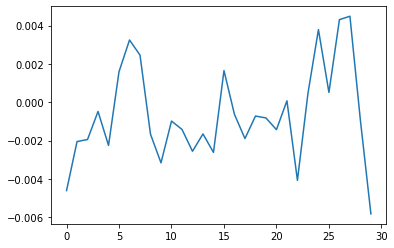

In [46]:
residuals2.plot()

#### Mean square forecast error

In [47]:
#MSFE2 = list(residuals)
#MSFE2 = statistics.mean([x**2 for x in MSFE2])
#MSFE2

In [48]:
MSFE2 = statistics.mean(df_NDG_test.reset_index(drop=True)**2 - pred2**2)
MSFE2

-0.005391940114661509

## Test Diebold-Mariano

In [49]:
from dm_test import dm_test
#import random

#random.seed(123)
actual_lst = list(df_NDG_test)
pred1_lst = list(pred)
pred2_lst = list(pred2)

#actual_lst = random.sample(actual_lst,100)
#pred1_lst = random.sample(pred1_lst,100)
#pred2_lst = random.sample(pred2_lst,100)

rt = dm_test(actual_lst,pred1_lst,pred2_lst,h = 1, crit="MAD")
print (rt)
rt = dm_test(actual_lst,pred1_lst,pred2_lst,h = 1, crit="MSE")
print (rt)
rt = dm_test(actual_lst,pred1_lst,pred2_lst,h = 1, crit="MAPE")
print (rt)
rt = dm_test(actual_lst,pred1_lst,pred2_lst,h = 1, crit="poly", power=4)
print (rt)

dm_return(DM=-0.8426405108131761, p_value=0.406325768460988)
dm_return(DM=-0.7970316534880559, p_value=0.43191012286728314)
dm_return(DM=-0.8454843856106136, p_value=0.4047626128482119)
dm_return(DM=-0.9033674664861808, p_value=0.3737739865619454)
